## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


# Objectives

## Additional Learning Resources
Refer to [scikit-learn documentation](https://scikit-learn.org/stable/) and the [Pandas user guide](https://pandas.pydata.org/docs/) for detailed explanations of the functions used in this notebook.
For a quick refresher on splitting data:
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```


1. What are Hyperparameters ? Why is Hyperparameter Tuning important ?
2. What is k-fold Cross-validation ? 
3. What is Grid Search Tuning ? What are its limitations ?
4. Making predictions with the best model

Run and example on a make moons dataset from sklearn for illustration

# Warm-up

**In groups of 2-3, run a quick research on Hyperparameters and try to answer the following:**

1. What is the difference between model **parameters** and **hyperparameters** ?
2. What is the importance of the **Hyperparameter Tuning** step in the ML workflow ?
3. Name **5 different hyperparameters** for each of the ML algorithms you already know (Logistic Regression, Random Forest and Linear Regression)


Linear Regression

y = w.X + intercept

y = w0 + w1.x1 + w2.x2 + ..... + wn.xn

Linear Regression Hyperparamters:

1. alpha (gradient descent learning rate)
2. Regularization coefficient (how strong the regularization is) and the regularization type (L1, L2, and hybrid)
3. stopping criterion for the gradient descent
4. Max of number iteration
5. the solver (the type/flavor of gradient descent algorithm)

Random Forest:

1. Depth of tree
2. Number of trees
3. number of feature of trees
4. Min number of samples per leaf

**Steps of a ML development pipeline**

1. Collect data
2. Split: train, validation, test
3. EDA (...) exploratory data analysis: we look at features, their distributions, cleaning the data, filling missing values, lloking at correlation between features and output and in between features ...etc.
3. Split: train, validation, test
4. We fit a very straightforward simple model as our baseline (e.g. dummy classifier)
5. use train and validation data to iteratively improve my model/find best model (feature engineering, hyperparameter tuning, ...)
6. After steps 1-4, we end up with Best Model (best features to use, best hyperparameter values)
7. apply best model to test data to estimate how the model will perform on new data (using test score, should not vary too much from the best validation score I get in step 4-5)
8. By now, you know the transformations, encoding,...etc steps you need. Retrain best model on **all the data you have!!** (train+validation+test), and then it is ready for deployment

In [ ]:
# Practice: implement the steps discussed above


## A

**linear regression parameters:** 
 - intercept
 - the weights 

**model parameters are:** 

- the variables that the model learns during training automatically
- They are used for prediction

**what are the hyperparameters ?** 

- they are variables that **are NOT** learned by the model during training, rather 
they are manually set by the practitioner 
- They control an aspect of the training of the model
- The model does not use the values of hyperparameters in predicting

## 1. What are Hyperparameters ?

**Hyperparameters are:**

1. A variable that controls some aspect of the training process of a ML algorithm
2. The value of a hyperparameter is **NOT** learned by the ML algorithm during training
3. The value of the hyperparameter is set by the ML parctitioner
4. All ML algorithms available have some hyperparameters, some more than others. All traditional ML algorithms come with default values for their hyperparameters
5. The best set of values for an ML algorithm is **problem/data-dependent** and is obtained using a hyperparameter tunung method
6. Tuning hyperparameters will probably result in a better model that is not overfitted and generalizes well to unseen data


### Let's build some dataset for illustration

In [37]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [38]:
X, y = make_moons(n_samples=600, noise=0.3)



In [3]:
X.shape, y.shape




((600, 2), (600,))

In [39]:
X



array([[ 0.65287634,  0.490441  ],
       [-0.33294251,  1.18918302],
       [ 1.03746223, -0.56134001],
       ...,
       [ 0.97455052, -0.27521345],
       [-1.46543238, -0.07373162],
       [ 0.17250792,  1.22813993]])

In [5]:
y



array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,

### Let's plot the data

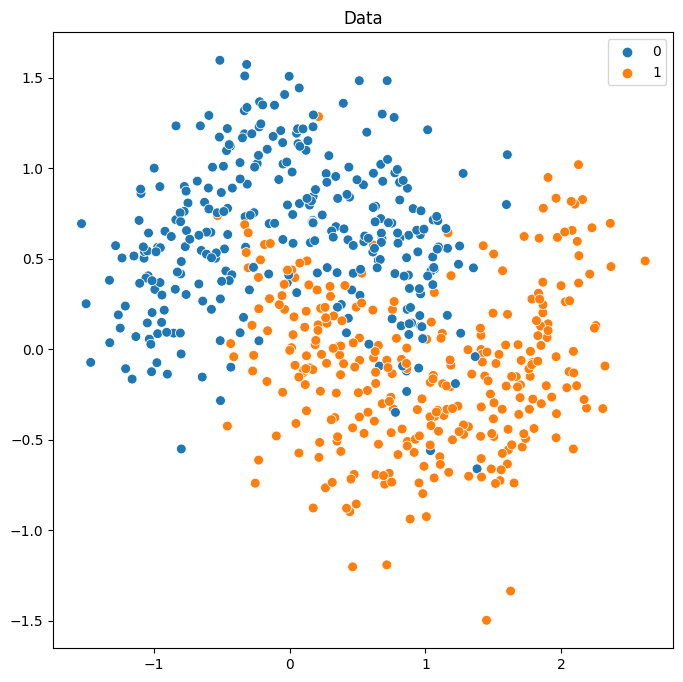

In [40]:
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, s=50, ax=ax).set_title("Data")

plt.show()



### Q: Which type of problem is this ? Which ML algorithms are viable options ?

### Let's try a Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



In [42]:
# we must split the data!

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)



In [43]:
Xtrain.shape, Xtest.shape



((450, 2), (150, 2))

In [44]:
rf = RandomForestClassifier()   # using default values



In [45]:
rf

RandomForestClassifier()

In [46]:
# fit baseline

rf.fit(Xtrain, ytrain)



RandomForestClassifier()

In [48]:
# my training score, for a classification problem the default score is accuracy

rf.score(Xtrain, ytrain)

1.0

In [49]:
# my test score, this is a way to estimate how the model will perform on unseen data

rf.score(Xtest, ytest)

0.8733333333333333

### What is wrong here ?!!

- overfitting, probably comes from not setting some hyperparameters
- I did not validate my model!

..

## 2. K-fold Cross-Validation

- It is a statistical resampling procedure used to evaluate machine learning models on a limited data sample

- It has a single parameter called $k$ that refers to the number of groups that a given data sample is to be split into

- It is used to estimate the skill of a ML model on unseen data

With cross-validation, we don't need a separate validation dataset. We can use all our training data for model fitting and selection!

* With cross-validation, we can see if our model is overfitting, without touching the test data!!! 
* The training-data gets split again into $k$ smaller sets and we get back $k$ validation scores 
* The mean of these scores can then be our estimation of the model score on the test data

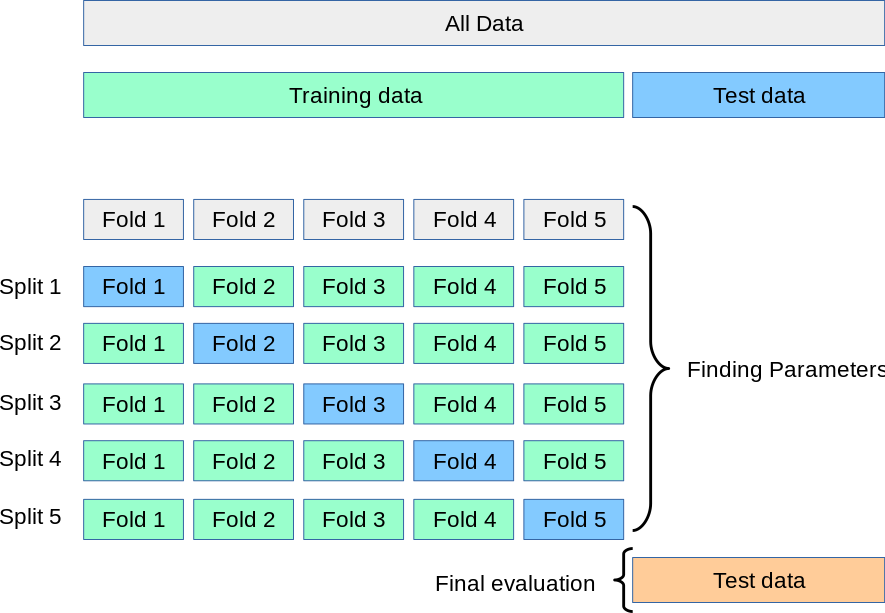

### Let's apply this to our data

In [50]:
from sklearn.model_selection import cross_val_score

In [54]:
rf = RandomForestClassifier()   # using default values

In [57]:
cross_acc = cross_val_score(estimator=rf,        # estimator: # the model you want to evaluate/unfitted 
                            X=Xtrain,            # the training input data 
                            y=ytrain,            # the training output data  
                            cv=5,                # number of cross validation datasets, k   
                            scoring='accuracy'   # evaluation metric 
                            ) 

In [58]:
# these are the validation scores for the k fitted models in cross validation

cross_acc

array([0.9       , 0.87777778, 0.88888889, 0.88888889, 0.93333333])

In [59]:
# mean of the scores of the 5 different fitted models


# let's compare this to our previous training score....


cross_acc.mean()   

0.8977777777777778

In [60]:
cross_acc.std()

0.019116278371205855

In [ ]:
# Practice: implement the steps discussed above


### Conclusion ?

### Q: so what does this comparision tell us ?

* If training score >> mean(validation_scores), then you are overfitting!!
* If there is **high variation** in the validation scores, then you have high sampling bias! 
* You probably need more data, pick a different model or change the hyperparameters

## Grid Search Tuning

* Instead of trying out different hyperparameters values manually, we can use a **Grid Search**
* **Input**: we provide a dictionary with hyperparameters and their possible values that will be "searched"
* For **each and every possible combination** of the values we input, a model is trained and validated using CV and the validation score is stored (cv_acc.mean())
* After **all** models are validated, the model of the best validation score wins!

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
rf_opt = RandomForestClassifier()  # a unfitted model

In [64]:
# define our hyperparameters to combine, 5.4.3 = 60 combinations of hyperparamters, for each combination we ate fitting
# k=5 models

# python dict

hyperparam_grid = {
    'max_depth': [2, 5, 10, 20, 30], 
    'n_estimators': [5, 10, 100, 200],
    'min_samples_leaf': [1,5,10]
}



In [65]:
grid_cv = GridSearchCV(estimator=rf_opt,            # unfitted model/estimator
                       param_grid=hyperparam_grid,  # hyperparameters dict
                       cv=5,                        # number of folds, k
                       scoring='accuracy')          # scoring metric

In [66]:
# fit all models with all the different hyperparamters
grid_cv.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'n_estimators': [5, 10, 100, 200]},
             scoring='accuracy')

### How can we examine the results ??

## 4. Making predictions with the best model

### 1. Examining all results

In [67]:
results_df = pd.DataFrame(grid_cv.cv_results_)

In [68]:
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008987,0.002593,0.001191,0.000338,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.833333,0.866667,0.866667,0.933333,0.944444,0.888889,0.042745,41
1,0.008865,0.001207,0.000894,0.000135,2,1,10,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.877778,0.866667,0.833333,0.922222,0.866667,0.873333,0.028631,57
2,0.067924,0.000697,0.004746,0.000137,2,1,100,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.877778,0.855556,0.877778,0.922222,0.888889,0.884444,0.021773,46
3,0.134257,0.000479,0.008927,0.000202,2,1,200,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.877778,0.855556,0.877778,0.922222,0.900000,0.886667,0.022662,45
4,0.003694,0.000080,0.000482,0.000008,2,5,5,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.877778,0.855556,0.877778,0.877778,0.866667,0.871111,0.008889,59
5,0.007183,0.000210,0.000780,0.000078,2,5,10,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.877778,0.866667,0.877778,0.900000,0.888889,0.882222,0.011331,50
6,0.067295,0.001025,0.004682,0.000259,2,5,100,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.844444,0.866667,0.866667,0.911111,0.900000,0.877778,0.024343,55
7,0.134081,0.000455,0.008755,0.000031,2,5,200,"{'max_depth': 2, 'min_samples_leaf': 5, 'n_est...",0.877778,0.866667,0.866667,0.911111,0.888889,0.882222,0.016630,50
8,0.003671,0.000048,0.000482,0.000005,2,10,5,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.822222,0.800000,0.877778,0.866667,0.944444,0.862222,0.049988,60
9,0.007066,0.000146,0.000741,0.000062,2,10,10,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.855556,0.866667,0.866667,0.888889,0.888889,0.873333,0.013333,57


In [70]:
results_df.shape

(60, 16)

In [69]:
results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [72]:
results_df[['param_max_depth', 'param_min_samples_leaf', 'param_n_estimators', 'mean_test_score',
       'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,param_max_depth,param_min_samples_leaf,param_n_estimators,mean_test_score,std_test_score,rank_test_score
25,10,1,10,0.904444,0.030307,1
39,20,1,200,0.902222,0.017778,2
28,10,5,5,0.900000,0.033702,3
52,30,5,5,0.900000,0.024343,3
49,30,1,10,0.900000,0.012172,3
53,30,5,10,0.897778,0.042397,6
50,30,1,100,0.897778,0.021545,6
44,20,10,5,0.897778,0.025724,6
43,20,5,200,0.897778,0.030952,6
42,20,5,100,0.897778,0.033993,6


### 2. Examining the best set of values for the hyperparameters

In [73]:
grid_cv.best_params_  

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 10}

### 3. Estimating the test performance after tuning

In [74]:
#rf_best = grid_cv.best_estimator_    # this is our best trained model

rf_best = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=1)

cross_acc = cross_val_score(estimator=rf_best,  # estimator: # the model you want to evaluate 
                            X=Xtrain,           # the training input data 
                            y=ytrain,           # the training output data  
                            cv=5,               # number of cross validation datasets, k   
                            scoring='accuracy') # evaluation metric 

In [75]:
cross_acc

array([0.91111111, 0.84444444, 0.9       , 0.9       , 0.92222222])

In [76]:
# we expected this to be very close to the value we got in the results table of the Grid Search

cross_acc.mean()

0.8955555555555555

### 4. Calculating the test score with the best model

In [77]:
rf_best = grid_cv.best_estimator_

In [35]:
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200)

In [78]:
rf_best.score(Xtest, ytest)

0.88

In [ ]:
# Practice: implement the steps discussed above
